# Comparativa Clasificadores NaiveBayes> Aimara Rodriguez Gómez



Este cuaderno tiene como objetivo comparar diferentes clasificadores Naive Bayes (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB y CategoricalNB) en dos conjuntos de datos distintos: el conjunto de datos Iris y el conjunto de datos Penguins. Entrenaremos cada clasificador, haremos predicciones, evaluaremos su precisión y visualizaremos sus matrices de confusión para comprender su rendimiento.

### Análisis del conjunto de datos Iris

Primero, aplicaremos los clasificadores Naive Bayes al conocido conjunto de datos Iris. Este conjunto de datos se utiliza comúnmente para tareas de clasificación y sirve como un buen punto de partida para demostrar el comportamiento de los modelos.

### Importaciones

En este bloque, importamos todas las bibliotecas necesarias para el análisis. `seaborn` se usa para cargar conjuntos de datos y para visualizaciones, `sklearn.model_selection` para dividir los datos, `sklearn.naive_bayes` para los diferentes clasificadores, `sklearn.metrics` para evaluar el rendimiento del modelo (como la precisión y la matriz de confusión), `matplotlib.pyplot` para graficar, `numpy` para operaciones numéricas, `pandas` para manipulación de datos y `sklearn.utils.multiclass` para manejar etiquetas únicas.

- Importaciones

In [34]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler

### Carga y Exploración Inicial de Datos (Iris)

Aquí cargamos el conjunto de datos `iris` directamente desde la biblioteca `seaborn`. El `display(iris)` muestra las primeras filas del DataFrame, permitiéndonos ver la estructura de los datos, incluyendo las características numéricas (sepal_length, sepal_width, petal_length, petal_width) y la variable objetivo categórica (species).

In [35]:
# Descarga de los datos

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Separación de Características y Variable Objetivo (Iris)

En este paso, dividimos el conjunto de datos `iris` en características (`X`) y la variable objetivo (`y`). `X` contendrá las medidas de las flores, mientras que `y` contendrá las especies de Iris. Luego, aplicamos `train_test_split` para separar `X` y `y` en conjuntos de entrenamiento (60%) y prueba (40%). El `random_state=1` asegura que la división sea reproducible.

In [36]:
# Separación de datos I/O

X = iris.drop('species', axis=1)
y = iris['species']

# Separación del Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Preprocesamiento

In [37]:
# --- Pre-procesamiento para MNB y CNB (Escalamiento para datos de conteo) ---
scaler_iris = MinMaxScaler()
X_train_scaled_iris = scaler_iris.fit_transform(x_train)
X_test_scaled_iris = scaler_iris.transform(x_test)

### Instanciación de los Modelos Naive Bayes (Iris)

En este bloque, creamos una instancia de cada uno de los cinco tipos de clasificadores Naive Bayes que vamos a comparar: `GaussianNB`, `MultinomialNB`, `ComplementNB`, `BernoulliNB` y `CategoricalNB`. Cada uno de estos modelos tiene diferentes supuestos sobre la distribución de los datos, lo que los hace adecuados para distintos tipos de características y problemas de clasificación.

- Clasificadores

In [38]:
# Instancias de los modelos

model_gaussian = GaussianNB()
model_multinomial = MultinomialNB()
model_complement = ComplementNB()
model_bernoulli = BernoulliNB()
model_categorical = CategoricalNB()

In [39]:
# Entrenamiento Categórico
model_categorical.fit(x_train, y_train)

CategoricalNB()

In [40]:
# Entrenamiento Gausiano
model_gaussian.fit(x_train, y_train)

GaussianNB()

In [41]:
# Entrenamiento Multinomial
model_multinomial.fit(X_train_scaled_iris, y_train) # <-- Usando datos escalados

MultinomialNB()

In [42]:
# Entrenamiento ComplementNB
model_complement.fit(X_train_scaled_iris, y_train) # <-- Usando datos escalados

ComplementNB()

In [43]:
# Entrenamiento BernoulliNB
model_bernoulli.fit(x_train, y_train)

BernoulliNB()

### Realización de Predicciones (Iris)

Una vez que los modelos han sido entrenados, utilizamos este bloque para realizar predicciones sobre el conjunto de datos de prueba (`x_test`). Cada modelo genera su propio conjunto de predicciones (`y_pred`), que luego utilizaremos para evaluar su rendimiento comparándolas con las etiquetas reales (`y_test`).

In [44]:
# Predicción con nuevos datos
y_pred_categorical = model_categorical.predict(x_test)
y_pred_gaussian = model_gaussian.predict(x_test)
y_pred_multinomial = model_multinomial.predict(X_test_scaled_iris) # <-- Usando datos escalados
y_pred_complement = model_complement.predict(X_test_scaled_iris) # <-- Usando datos escalados
y_pred_bernoulli = model_bernoulli.predict(x_test)

### Evaluación de la Precisión (Iris)

En este bloque, calculamos la `accuracy_score` para cada clasificador Naive Bayes. La precisión mide la proporción de predicciones correctas sobre el total de predicciones. Los resultados se imprimen redondeados a dos decimales, proporcionando una medida inicial del rendimiento de cada modelo en el conjunto de datos Iris.

- Evaluación

In [45]:
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
accuracy_complement = accuracy_score(y_test, y_pred_complement)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Accuracy Categorical:", round(accuracy_categorical, 2))
print("Accuracy Gausiano:", round(accuracy_gaussian, 2))
print("Accuracy Multinomial:", round(accuracy_multinomial, 2))
print("Accuracy Complement:", round(accuracy_complement, 2))
print("Accuracy Bernoulli:", round(accuracy_bernoulli, 2))

Accuracy Categorical: 0.97
Accuracy Gausiano: 0.95
Accuracy Multinomial: 0.62
Accuracy Complement: 0.65
Accuracy Bernoulli: 0.32


### Definición de la Función de Visualización de Matriz de Confusión

Este bloque define la función `visualizacion_matriz_confusion`, una utilidad personalizada para generar y mostrar matrices de confusión. Toma como entrada las etiquetas verdaderas (`y_true`), las etiquetas predichas (`y_pred`), un título opcional y un mapa de colores. La función calcula la matriz de confusión, normaliza los valores y etiqueta los ejes con los nombres de las clases, facilitando la interpretación visual de los resultados de la clasificación.

- Matriz de confusión

In [46]:
def visualizacion_matriz_confusion(y_true, y_pred, title=None, cmap=plt.cm.Oranges, titleSup=None, ax=None):

    cm = confusion_matrix(y_true, y_pred)
    classes = clases_iris[unique_labels(y_true, y_pred)]

    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    # fig.tight_layout() # This should be called on the main figure if multiple subplots
    ax.set_title(titleSup, fontsize=12) # Use ax.set_title for subplot title
    return ax

In [47]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= y_test.to_frame()
ytest_df= ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])

/tmp/ipython-input-1772953929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_df= ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


In [48]:
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df_categorical = pd.DataFrame(y_pred_categorical, columns = ['species'])
y_model_df_categorical['species'] = y_model_df_categorical['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array_categorical = y_model_df_categorical['species'].to_numpy()

/tmp/ipython-input-2202615541.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_categorical['species'] = y_model_df_categorical['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


In [49]:
y_model_df_gaussian = pd.DataFrame(y_pred_gaussian, columns = ['species'])
y_model_df_gaussian['species'] = y_model_df_gaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
y_model_array_gaussian = y_model_df_gaussian['species'].to_numpy()

/tmp/ipython-input-515338401.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_gaussian['species'] = y_model_df_gaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


In [50]:
y_model_df_multinomial = pd.DataFrame(y_pred_multinomial, columns = ['species'])
y_model_df_multinomial['species'] = y_model_df_multinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
y_model_array_multinomial = y_model_df_multinomial['species'].to_numpy()

/tmp/ipython-input-4035305673.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_multinomial['species'] = y_model_df_multinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


In [51]:
y_model_df_complement = pd.DataFrame(y_pred_complement, columns = ['species'])
y_model_df_complement['species'] = y_model_df_complement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
y_model_array_complement = y_model_df_complement['species'].to_numpy()

/tmp/ipython-input-2450334710.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_complement['species'] = y_model_df_complement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


In [52]:
y_model_df_bernoulli = pd.DataFrame(y_pred_bernoulli, columns = ['species'])
y_model_df_bernoulli['species'] = y_model_df_bernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])
y_model_array_bernoulli = y_model_df_bernoulli['species'].to_numpy()

/tmp/ipython-input-4081283263.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_df_bernoulli['species'] = y_model_df_bernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2])


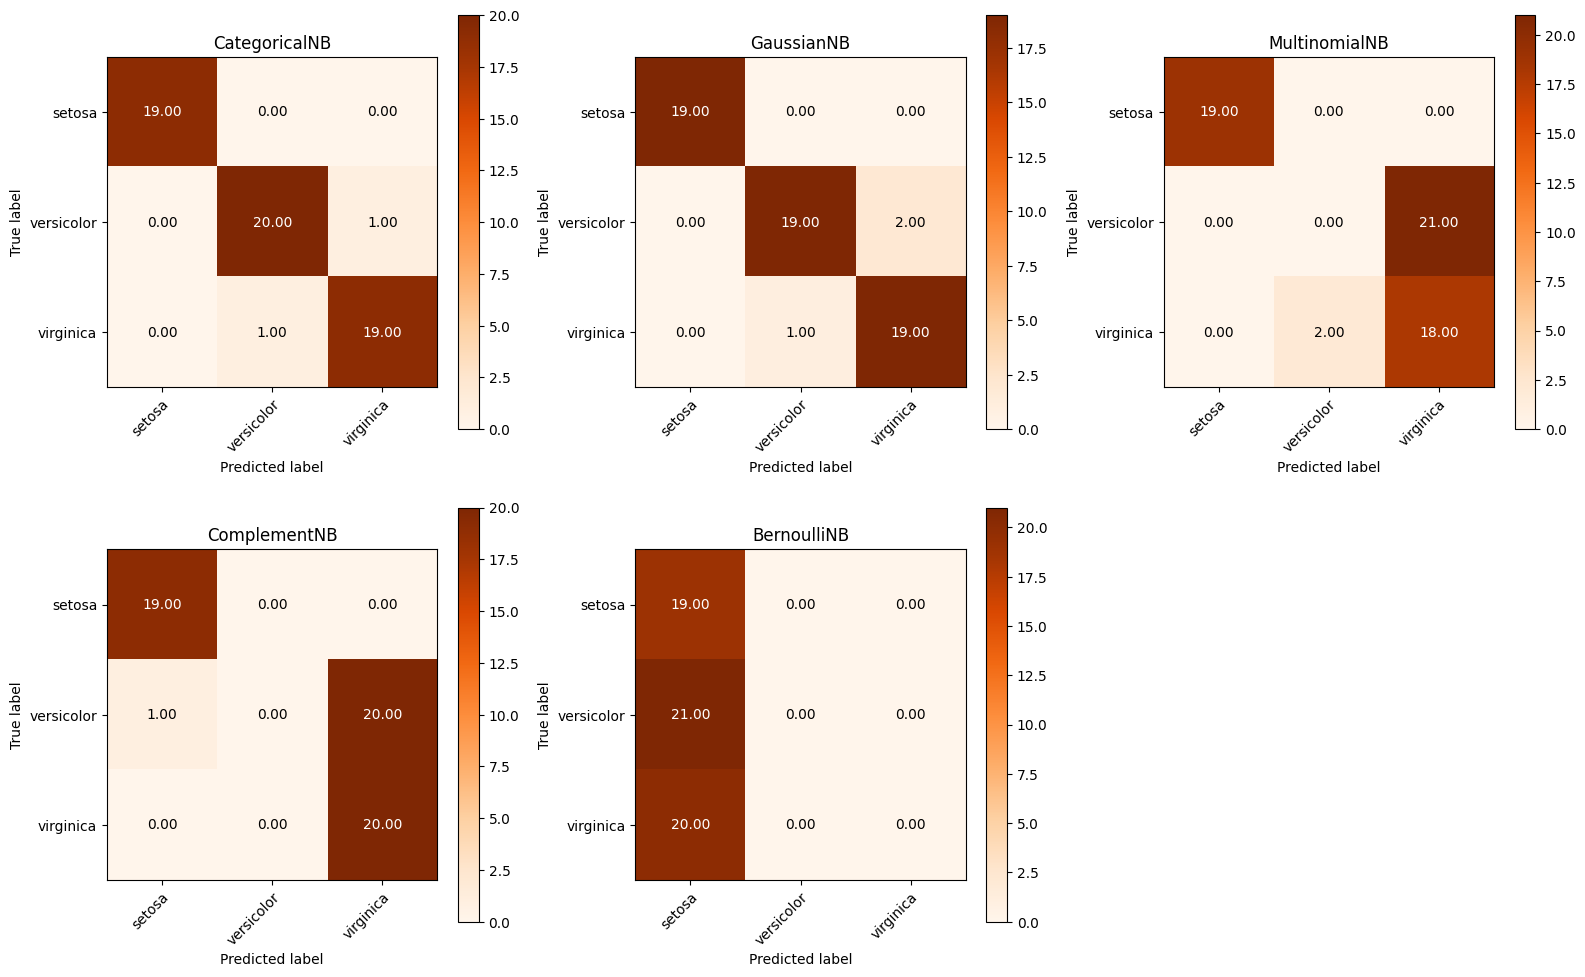

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

visualizacion_matriz_confusion(ytest_df, y_model_array_categorical, title='Normalized confusion matrix', titleSup='CategoricalNB', ax=axes[0])
visualizacion_matriz_confusion(ytest_df, y_model_array_gaussian, title='Normalized confusion matrix', titleSup='GaussianNB', ax=axes[1])
visualizacion_matriz_confusion(ytest_df, y_model_array_multinomial, title='Normalized confusion matrix', titleSup='MultinomialNB', ax=axes[2])
visualizacion_matriz_confusion(ytest_df, y_model_array_complement, title='Normalized confusion matrix', titleSup='ComplementNB', ax=axes[3])
visualizacion_matriz_confusion(ytest_df, y_model_array_bernoulli, title='Normalized confusion matrix', titleSup='BernoulliNB', ax=axes[4])

# Hide the last empty subplot if there are an odd number of plots
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Análisis del conjunto de datos Penguins

A continuación, utilizaremos el conjunto de datos Penguins, que presenta un escenario ligeramente más complejo con características categóricas y numéricas, y algunos valores faltantes. Esto nos permitirá observar cómo los clasificadores manejan los diferentes tipos de datos y los pasos de preprocesamiento.

### Carga y Exploración Inicial de Datos (Penguins)

De manera similar al conjunto de datos Iris, cargamos el conjunto de datos `penguins` usando `seaborn`. El `display(pinguinos)` nos permite inspeccionar las primeras filas. Este conjunto de datos es más complejo, ya que incluye características numéricas y categóricas, y presenta valores faltantes, lo que requiere pasos adicionales de preprocesamiento.

In [54]:
# Descarga de los datos

pinguinos = sns.load_dataset('penguins')
pinguinos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Separación de Características y Variable Objetivo (Penguins)

Aquí, separamos las características (`X`) y la variable objetivo (`y`) del conjunto de datos `pinguinos`. La variable objetivo es `species` (la especie de pingüino). Luego, dividimos los datos en conjuntos de entrenamiento (60%) y prueba (40%) utilizando `train_test_split`, con un `random_state=1` para asegurar la reproducibilidad.

In [55]:
# Separación de datos I/O

X = pinguinos.drop('species', axis=1)
y = pinguinos['species']

# Separación del Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### Preprocesamiento

In [56]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# --- Pre-procesamiento para Penguins: Manejo de NaNs y Codificación de Categoricales ---

# Crear copias para procesar sin afectar los datos originales
x_train_processed = x_train.copy()
x_test_processed = x_test.copy()

# 1. Manejar valores NaN
# Imputar columnas numéricas con la media (del conjunto de entrenamiento)
numerical_cols = x_train_processed.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if x_train_processed[col].isnull().any():
        mean_val = x_train_processed[col].mean()
        x_train_processed[col] = x_train_processed[col].fillna(mean_val)
        x_test_processed[col] = x_test_processed[col].fillna(mean_val)

# Imputar columnas categóricas con la moda (del conjunto de entrenamiento)
categorical_cols = x_train_processed.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if x_train_processed[col].isnull().any():
        mode_val = x_train_processed[col].mode()[0]
        x_train_processed[col] = x_train_processed[col].fillna(mode_val)
        x_test_processed[col] = x_test_processed[col].fillna(mode_val)

# 2. Codificar características categóricas
# (Esto convierte las columnas categóricas en números enteros)
if len(categorical_cols) > 0:
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    x_train_processed[categorical_cols] = encoder.fit_transform(x_train_processed[categorical_cols])
    x_test_processed[categorical_cols] = encoder.transform(x_test_processed[categorical_cols])

# --- Escalamiento para MultinomialNB y ComplementNB (solo sobre datos numéricos) ---
# Ahora que x_train_processed y x_test_processed son completamente numéricos, podemos escalarlos.
scaler_penguins = MinMaxScaler()
X_train_scaled_penguins = scaler_penguins.fit_transform(x_train_processed)
X_test_scaled_penguins = scaler_penguins.transform(x_test_processed)

### Instanciación de los Modelos Naive Bayes (Penguins)

Al igual que con el conjunto de datos Iris, en este bloque se instancian los cinco tipos de clasificadores Naive Bayes: `GaussianNB`, `MultinomialNB`, `ComplementNB`, `BernoulliNB` y `CategoricalNB`. Estos modelos se entrenarán y evaluarán en el conjunto de datos preprocesado de los pingüinos.

- Clasificadores

In [57]:
# Instancias de los modelos

model_gaussian = GaussianNB()
model_multinomial = MultinomialNB()
model_complement = ComplementNB()
model_bernoulli = BernoulliNB()
model_categorical = CategoricalNB()

In [58]:
# Entrenamiento Gausiano
model_gaussian.fit(x_train_processed, y_train)

GaussianNB()

In [59]:
# Entrenamiento Multinomial
model_multinomial.fit(X_train_scaled_penguins, y_train)

MultinomialNB()

In [60]:
# Entrenamiento ComplementNB
model_complement.fit(X_train_scaled_penguins, y_train)

ComplementNB()

In [61]:
# Entrenamiento BernoulliNB
model_bernoulli.fit(x_train_processed, y_train)

BernoulliNB()

In [62]:
# Entrenamiento CategoricalNB
# CategoricalNB debe entrenarse solo con características categóricas discretas.
# Asumimos que 'island' y 'sex' son las columnas categóricas después del preprocesamiento.
model_categorical.fit(x_train_processed[['island', 'sex']], y_train)

CategoricalNB()

### Realización de Predicciones (Penguins)

Después de entrenar los modelos con los datos preprocesados de los pingüinos, este bloque se encarga de generar las predicciones sobre el conjunto de prueba (`x_test_processed`). Es importante destacar la corrección aplicada para `CategoricalNB`, donde se ajustan los valores de `x_test_processed` para que estén dentro del rango de categorías observadas durante el entrenamiento, evitando errores debido a la interpretación de valores numéricos continuos como categorías discretas por este modelo específico.

In [63]:
# 1. Predicción para CategoricalNB, GaussianNB y BernoulliNB
# CategoricalNB: Usa solo las características categóricas (island, sex).
# GaussianNB y BernoulliNB: Usan el conjunto de datos de prueba preprocesado completo.
y_pred_categorical = model_categorical.predict(x_test_processed[['island', 'sex']])
y_pred_gaussian = model_gaussian.predict(x_test_processed)
y_pred_bernoulli = model_bernoulli.predict(x_test_processed)

# 2. Predicción para MultinomialNB y ComplementNB
# Estos modelos deben usar el conjunto de datos de prueba escalado (X_test_scaled_penguins).
y_pred_multinomial = model_multinomial.predict(X_test_scaled_penguins)
y_pred_complement = model_complement.predict(X_test_scaled_penguins)

### Evaluación de la Precisión (Penguins)

En este bloque, calculamos y mostramos la `accuracy_score` para cada clasificador Naive Bayes aplicado al conjunto de datos de los pingüinos. La precisión proporciona una métrica de rendimiento que indica la proporción de predicciones correctas realizadas por cada modelo. Los resultados se redondean a dos decimales para facilitar la comparación.

- Evaluación

In [64]:
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
accuracy_complement = accuracy_score(y_test, y_pred_complement)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Accuracy Categorical:", round(accuracy_categorical, 2))
print("Accuracy Gausiano:", round(accuracy_gaussian, 2))
print("Accuracy Multinomial:", round(accuracy_multinomial, 2))
print("Accuracy Complement:", round(accuracy_complement, 2))
print("Accuracy Bernoulli:", round(accuracy_bernoulli, 2))

Accuracy Categorical: 0.67
Accuracy Gausiano: 0.96
Accuracy Multinomial: 0.76
Accuracy Complement: 0.71
Accuracy Bernoulli: 0.66


### Definición de la Función de Visualización de Matriz de Confusión (para Penguins)

Este bloque define la misma función `visualizacion_matriz_confusion` utilizada para el conjunto de datos Iris, pero adaptada para ser usada con los pingüinos. Esta función es clave para visualizar el rendimiento de clasificación de cada modelo, permitiendo identificar errores específicos y el rendimiento por clase a través de la matriz de confusión generada.

In [65]:
def visualizacion_matriz_confusion(y_true, y_pred, title=None, cmap=plt.cm.Blues, titleSup=None, ax=None):

    cm = confusion_matrix(y_true, y_pred)
    classes = clases_penguins[unique_labels(y_true, y_pred)]

    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    # fig.tight_layout() # This should be called on the main figure if multiple subplots
    ax.set_title(titleSup, fontsize=12) # Use ax.set_title for subplot title
    return ax

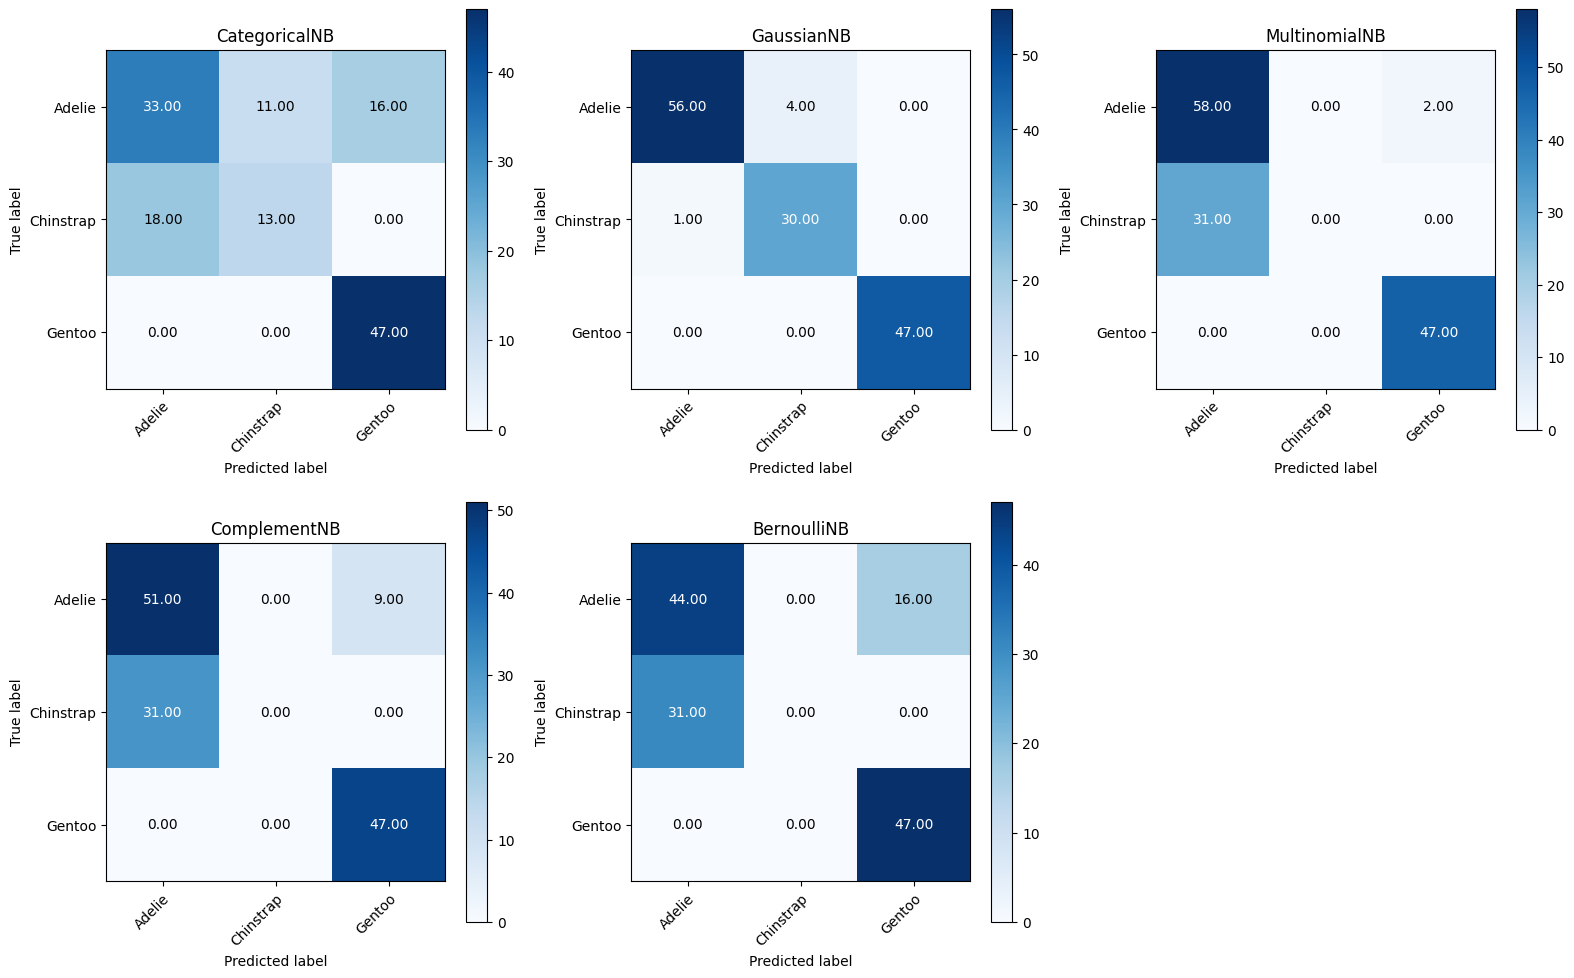

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

# Define penguin species and their numerical mapping
penguin_species = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
species_to_int_map = {species: i for i, species in enumerate(penguin_species)}

clases_penguins = penguin_species # Esta variable se utiliza dentro de visualizacion_matriz_confusion

# Convierte y_test a representación numérica
y_test_numeric = y_test.map(species_to_int_map).to_numpy()

# Convierte cada array de y_pred a representación numérica
y_pred_categorical_numeric = pd.Series(y_pred_categorical).map(species_to_int_map).to_numpy()
y_pred_gaussian_numeric = pd.Series(y_pred_gaussian).map(species_to_int_map).to_numpy()
y_pred_multinomial_numeric = pd.Series(y_pred_multinomial).map(species_to_int_map).to_numpy()
y_pred_complement_numeric = pd.Series(y_pred_complement).map(species_to_int_map).to_numpy()
y_pred_bernoulli_numeric = pd.Series(y_pred_bernoulli).map(species_to_int_map).to_numpy()

visualizacion_matriz_confusion(y_test_numeric, y_pred_categorical_numeric, title='Normalized confusion matrix', titleSup='CategoricalNB', ax=axes[0])
visualizacion_matriz_confusion(y_test_numeric, y_pred_gaussian_numeric, title='Normalized confusion matrix', titleSup='GaussianNB', ax=axes[1])
visualizacion_matriz_confusion(y_test_numeric, y_pred_multinomial_numeric, title='Normalized confusion matrix', titleSup='MultinomialNB', ax=axes[2])
visualizacion_matriz_confusion(y_test_numeric, y_pred_complement_numeric, title='Normalized confusion matrix', titleSup='ComplementNB', ax=axes[3])
visualizacion_matriz_confusion(y_test_numeric, y_pred_bernoulli_numeric, title='Normalized confusion matrix', titleSup='BernoulliNB', ax=axes[4])

# Esconde el último subplot ya que son un número impar de NB
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Conclusión
En el dataset Iris, que es un conjunto de datos clásico con características numéricas que suelen seguir distribuciones bien definidas, los resultados fueron:

* **Categorical Naive Bayes (CategoricalNB)**: Tuvo el mejor rendimiento (0.97 de precisión). Esto se debe a que, para este dataset específico, las características (a pesar de ser continuas) tienen umbrales claros que permiten una buena discretización implícita o explícita, y las relaciones categóricas entre clases se modelan muy bien. Es posible que la baja dimensionalidad y la clara separación de las clases favorezcan este modelo aquí.
* **Gaussian Naive Bayes (GaussianNB)**: También mostró un rendimiento excelente (0.95 de precisión). La suposición de que las características numéricas siguen una distribución gaussiana es muy adecuada para el dataset Iris, lo que permite a este clasificador modelar eficazmente los límites de decisión entre las clases.
* **Multinomial Naive Bayes (MultinomialNB)** y **Complement Naive Bayes (ComplementNB)**: Obtuvieron una precisión significativamente más baja (0.62 y 0.65 respectivamente). Estos modelos están diseñados para datos de conteo o frecuencias. Aunque aplicamos un escalado MinMaxScaler, la naturaleza de las características originales (longitudes y anchos) no se ajusta idealmente a los supuestos de estos clasificadores, lo que limita su capacidad para distinguir las clases de forma efectiva.
* **Bernoulli Naive Bayes (BernoulliNB)**: Fue el clasificador con el rendimiento más bajo (0.32 de precisión). Este modelo asume características binarias (presencia o ausencia). Aplicarlo a características continuas como las del Iris sin una binarización adecuada (o si la binarización elegida no es informativa) resulta en una gran pérdida de información y, por lo tanto, en una baja precisión.

Conclusión para el Dataset Penguins

Para el dataset de Penguins, que presenta una mayor complejidad con características numéricas, categóricas y valores faltantes que requieren un preprocesamiento más elaborado, los resultados fueron:

* **Gaussian Naive Bayes (GaussianNB)**: Fue el clasificador con el rendimiento más alto (0.96 de precisión). Esto resalta su robustez para características continuas. Después de la imputación de valores faltantes y la codificación de características categóricas, las características numéricas restantes pudieron ser modeladas eficazmente por la distribución gaussiana, lo que le permitió capturar las diferencias entre las especies de pingüinos.
* **Multinomial Naive Bayes (MultinomialNB)**: Logró un rendimiento respetable (0.76 de precisión). A pesar de su diseño para datos de conteo, la combinación de preprocesamiento (imputación, codificación ordinal de categóricas y escalado MinMaxScaler) parece haber transformado los datos de una manera que le permitió extraer información útil, superando a otros clasificadores de conteo.
* **Complement Naive Bayes (ComplementNB)**: Tuvo un rendimiento cercano a MultinomialNB (0.71 de precisión). Comparte supuestos similares con MultinomialNB y se desempeña de manera similar, siendo menos efectivo que GaussianNB pero mejor que BernoulliNB para este tipo de datos.
* **Categorical Naive Bayes (CategoricalNB)**: Obtuvo una precisión de 0.67. Este modelo solo se aplicó a las características categóricas ('island' y 'sex') después de su codificación ordinal. Su rendimiento indica que estas características por sí solas aportan una cantidad significativa de información, pero no tanta como el conjunto completo de características, especialmente las numéricas, que son muy discriminativas para las especies de pingüinos.
* **Bernoulli Naive Bayes (BernoulliNB)**: Nuevamente, fue el de menor rendimiento (0.66 de precisión), aunque ligeramente mejor que en el dataset Iris. Esto confirma que su especialización en características binarias lo hace menos adecuado para datasets con una mezcla de características continuas y categóricas ricas, donde se pierde mucha información si se binarizan de forma simple.

En síntesis, la elección del clasificador Naive Bayes más adecuado es crucial y debe basarse en la comprensión de los supuestos del modelo y la naturaleza de los datos. GaussianNB demostró ser el más versátil en este estudio, mientras que CategoricalNB brilló en Iris donde sus supuestos se alineaban mejor con las características. El preprocesamiento de datos juega un papel fundamental en la adaptación de los datos a los requisitos de cada clasificador para maximizar su rendimiento.